In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir=r"C:\Users\trupt\Downloads\archive (10)\Covid19-dataset\train"
test_dir=r"C:\Users\trupt\Downloads\archive (10)\Covid19-dataset\test"

In [3]:
train_generator=ImageDataGenerator(
   rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
shear_range=0.2,
zoom_range=0.2
)

In [4]:
test_generator=ImageDataGenerator(rescale=1.0/255)

In [5]:
width,height=512,512,
batch_size=32

In [6]:
X_train=train_generator.flow_from_directory(
train_dir,
target_size=(width,height),
batch_size=batch_size,
class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [7]:
X_test=test_generator.flow_from_directory(
test_dir,
target_size=(width,height),
batch_size=batch_size,
class_mode='categorical'
)

Found 66 images belonging to 3 classes.


In [8]:
model=Sequential([
Conv2D(32,(3,3), activation="relu",input_shape=(width,height,3)),
MaxPool2D((2,2)),
Conv2D(64,(3,3),activation="relu"),
MaxPool2D((2,2)),
Conv2D(128,(3,3),activation="relu"),
MaxPool2D((2,2)),
Conv2D(128,(3,3),activation="relu"),
MaxPool2D((2,2)),
Conv2D(64,(3,3),activation="relu"),
MaxPool2D((2,2)),
Flatten(),
Dense(256,activation="relu"),
Dense(128,activation="relu"),
Dense(3,activation="softmax"),
])

In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
history=model.fit(X_train,epochs=30,batch_size=batch_size,validation_data=X_test)

Epoch 1/30


8/8 [==============================] - 95s 11s/step - loss: 20.4224 - accuracy: 0.3625 - val_loss: 1.0975 - val_accuracy: 0.3939
Epoch 2/30
8/8 [==============================] - 75s 9s/step - loss: 1.1010 - accuracy: 0.4781 - val_loss: 1.0972 - val_accuracy: 0.3939
Epoch 3/30
8/8 [==============================] - 72s 9s/step - loss: 0.9633 - accuracy: 0.4980 - val_loss: 1.0949 - val_accuracy: 0.3939
Epoch 4/30
8/8 [==============================] - 70s 9s/step - loss: 0.7713 - accuracy: 0.6574 - val_loss: 1.0890 - val_accuracy: 0.3939
Epoch 5/30
8/8 [==============================] - 72s 9s/step - loss: 0.8228 - accuracy: 0.6773 - val_loss: 1.0878 - val_accuracy: 0.3939
Epoch 6/30
8/8 [==============================] - 76s 9s/step - loss: 0.6583 - accuracy: 0.7291 - val_loss: 1.0824 - val_accuracy: 0.4848
Epoch 7/30
8/8 [==============================] - 73s 9s/step - loss: 0.7478 - accuracy: 0.6653 - val_loss: 1.0749 - val_accuracy: 0.4848
Epoch 8/30
8/8 [==============

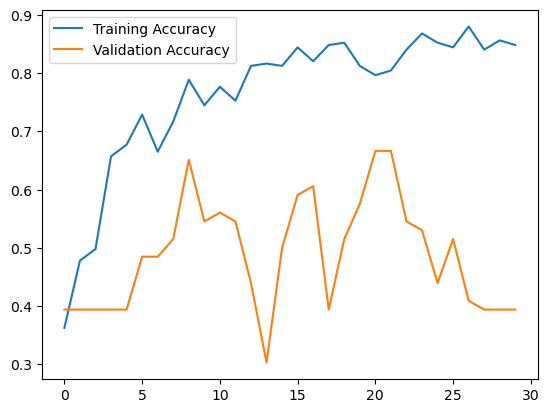

In [11]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel=("Epochs")
plt.ylabel=("Accuracy")
plt.title=("Accuracy")
plt.legend()

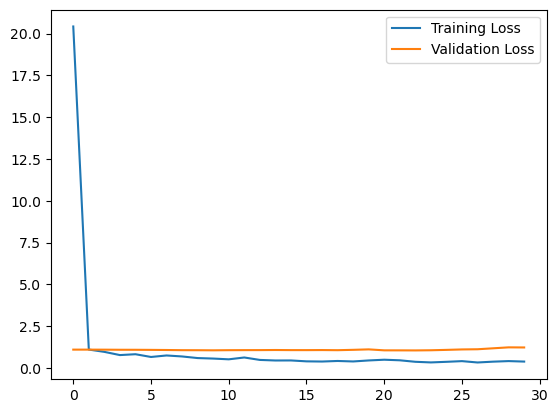

In [12]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel=("Epochs")
plt.ylabel=("Loss")
plt.title=("Loss")
plt.legend()

In [13]:
class_names=X_test.class_indices
classes={value:key for key, value in class_names.items()}
print("Class Names",classes)

Class Names {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [14]:
from tensorflow.keras.preprocessing import image

In [15]:
img=image.load_img(r"C:\Users\trupt\Downloads\archive (10)\Covid19-dataset\test\Covid\0100.jpeg",target_size=(width,height))

In [16]:
img_arr=image.img_to_array(img)

In [17]:
img_arr=np.expand_dims(img_arr,axis=0)

In [18]:
img_arr=img_arr/255

In [19]:
pred=model.predict(img_arr)

1/1 [==============================] - 1s 636ms/step


In [20]:
np.argmax(pred)

0

In [21]:
print("The given image is of class:", classes[np.argmax(pred)])

The given image is of class: Covid
